# Content

[Sampling Distributions (The Core Concept)](#sampling-distributions-the-core-concept)

[Sampling Distribution of the Sample Mean](#sampling-distribution-of-the-sample-mean)

[The Central Limit Theorem (CLT)](#the-central-limit-theorem-clt)

# Sampling distributions


### Sampling Distributions (The Core Concept)

To understand a sampling distribution, you must first distinguish it from two other types of distributions:

1.  **Population Distribution:** This is the distribution of a variable for *all individuals* in the population. It's the "true" distribution that we usually don't know. (e.g., the heights of *all* adult men in a country).
2.  **Sample Distribution:** This is the distribution of data from *one* sample that you collect. It's a small snapshot of the population. (e.g., the heights of 100 men you measured in a city).

So, what is a **Sampling Distribution**?

#### Theory
A **sampling distribution** is the probability distribution of a **sample statistic** (like the sample mean, `x̄`, or sample proportion, `p̂`) that is formed when we take **all possible samples of a fixed size `n`** from a population.

Think of it as a thought experiment:
1.  Imagine a population.
2.  Decide on a sample size `n`.
3.  Take one random sample of size `n` and calculate its mean. Write that mean down.
4.  Put the sample back, and take another random sample of size `n`. Calculate its mean. Write it down.
5.  Repeat this process an infinite number of times.
6.  The distribution of all the sample means you wrote down is the **sampling distribution of the sample mean**.

#### Conceptual Example
Imagine a tiny population of four people, with ages **{10, 20, 30, 40}**. The true population mean `μ` is (10+20+30+40)/4 = **25**.

Let's construct the sampling distribution of the sample mean for a sample size of `n=2`.
Here are all the possible samples we could take:

| Sample | Sample Mean (`x̄`) |
| :--- | :---: |
| {10, 20} | 15 |
| {10, 30} | 20 |
| {10, 40} | 25 |
| {20, 30} | 25 |
| {20, 40} | 30 |
| {30, 40} | 35 |

The list of sample means **{15, 20, 25, 25, 30, 35}** *is* the sampling distribution. It tells us every possible value a sample mean could take and how often it occurs.

#### Real-Life Usage
The sampling distribution is a theoretical idea, but it's the foundation of inference. It tells us how much we can expect a sample statistic (like a poll result) to vary from sample to sample. This natural variation is called **sampling error**. Knowing the properties of this distribution allows us to determine if our *one* sample result is likely or unlikely.

---

### Sampling Distribution of the Sample Mean

This is the most important sampling distribution. Let's formalize its properties.

#### Theory
If we have a population with a mean `μ` and a standard deviation `σ`, the sampling distribution of the sample mean (`x̄`) for a sample size `n` has the following properties:

*   **Mean of the Sampling Distribution (`μ_x̄`):**
    *   **μ_x̄ = μ**
    *   This is incredibly powerful. It means the sampling distribution is centered exactly on the true population mean. Our sample means are, on average, "unbiased" and will not systematically over- or under-estimate the truth.

*   **Standard Deviation of the Sampling Distribution (`σ_x̄`):**
    *   **σ_x̄ = σ / √n**
    *   This has a special name: the **Standard Error of the Mean (SEM)**.
    *   This formula is critical. It shows that as our sample size `n` **increases**, the standard error **decreases**. This means our sample means will be more consistent and cluster more tightly around the true population mean, making our estimates more precise.

#### Calculation Example
Suppose the average height of all adult women (`μ`) is 165 cm, with a population standard deviation (`σ`) of 10 cm. We decide to take random samples of `n=100` women.

What will be the mean and standard deviation of the sampling distribution of `x̄`?

*   **Mean (`μ_x̄`):**
    *   `μ_x̄` = `μ` = **165 cm**.

*   **Standard Deviation (Standard Error, `σ_x̄`):**
    *   `σ_x̄` = `σ` / `√n` = 10 / `√100` = 10 / 10 = **1 cm**.

**Interpretation:** While individual women's heights vary with a standard deviation of 10 cm, the *average height of a group of 100 women* will typically only vary from the true mean of 165 cm by about 1 cm.

---

### The Central Limit Theorem (CLT)

We know the center (`μ`) and spread (`σ/√n`) of the sampling distribution of the sample mean. But what is its **shape**? The Central Limit Theorem provides the astonishing answer.

#### Theory
The **Central Limit Theorem (CLT)** states that for a sufficiently large sample size `n`, the sampling distribution of the sample mean (`x̄`) will be **approximately Normal**, regardless of the shape of the original population distribution.

*   **Condition:** How large is "sufficiently large"? A common rule of thumb is `n ≥ 30`.
*   **Special Case:** If the original population is already Normal, then the sampling distribution will be exactly Normal for *any* sample size `n`.

The CLT is arguably the most important theorem in all of statistics. It allows us to use the well-understood properties of the Normal distribution (like the 68-95-99.7 rule and Z-scores) to make inferences about the population mean, even when we have no idea what the population itself looks like.

We combine all three topics to say:
**If n ≥ 30, then x̄ ~ N(μ, σ/√n)**
(The sample mean `x̄` is approximately Normally distributed with a mean `μ` and a standard deviation `σ/√n`).

#### Real-Life Usage
*   **Confidence Intervals:** When a research report says "the average approval rating is 45%, with a margin of error of 3%," they are using the CLT. They used the Standard Error (`σ/√n`) and the Normal model to determine how far their sample result is likely to be from the true population value.
*   **Hypothesis Testing:** When a pharmaceutical company wants to know if a new drug lowers blood pressure, they compare the sample mean of the drug group to the sample mean of the placebo group. The CLT allows them to calculate the probability of seeing such a difference just by random chance.

***

### Python Code Illustration




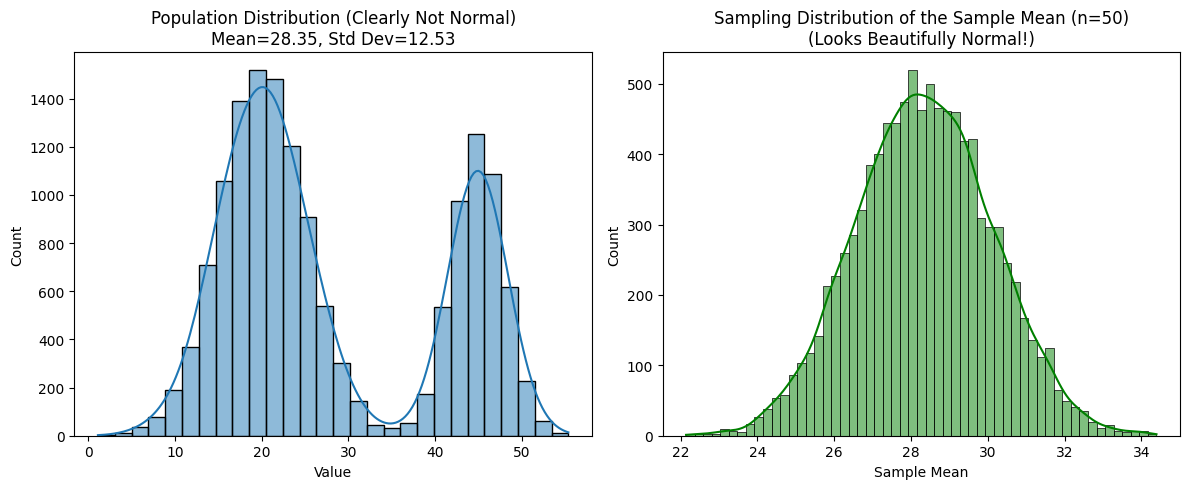

--- Comparing Theory vs. Simulation ---
Population Mean (μ): 28.3504
Mean of Sample Means (μ_x̄): 28.3368  <-- Very close to the population mean!
----------------------------------------
Theoretical Standard Error (σ/√n): 1.7716
Actual Std Dev of Sample Means: 1.7740  <-- Very close to the theoretical value!


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Create a Weird, Non-Normal Population ---
# We'll create a skewed population by combining two normal distributions.
# This population is NOT normal.
pop1 = np.random.normal(20, 5, 10000)   # Centered at 20
pop2 = np.random.normal(45, 3, 5000)    # A smaller bump centered at 45
population = np.concatenate([pop1, pop2])

# Calculate true population parameters
pop_mean = population.mean()
pop_std = population.std()

# Plot the population distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(population, kde=True)
plt.title(f"Population Distribution (Clearly Not Normal)\nMean={pop_mean:.2f}, Std Dev={pop_std:.2f}")
plt.xlabel("Value")


# --- 2. Generate the Sampling Distribution of the Sample Mean ---
sample_size = 50  # n=50, which is >= 30
num_samples = 10000 # Number of times we take a sample

# This list will store the mean of each sample we take
sample_means = []

for i in range(num_samples):
    # Take one random sample of size n from the population
    sample = np.random.choice(population, size=sample_size, replace=False)
    # Calculate the mean of that sample and store it
    sample_means.append(sample.mean())

# `sample_means` is now our sampling distribution!

# --- 3. Analyze and Plot the Sampling Distribution ---
# Calculate the mean and standard deviation of our list of sample means
sampling_mean = np.mean(sample_means)
sampling_std_dev = np.std(sample_means) # This is the Standard Error

# Calculate the THEORETICAL mean and standard error using the formulas
theoretical_mean = pop_mean
theoretical_std_err = pop_std / np.sqrt(sample_size)

# Plot the sampling distribution
plt.subplot(1, 2, 2)
sns.histplot(sample_means, kde=True, color='green')
plt.title(f"Sampling Distribution of the Sample Mean (n={sample_size})\n(Looks Beautifully Normal!)")
plt.xlabel("Sample Mean")
plt.tight_layout()
plt.show()

print("--- Comparing Theory vs. Simulation ---")
print(f"Population Mean (μ): {pop_mean:.4f}")
print(f"Mean of Sample Means (μ_x̄): {sampling_mean:.4f}  <-- Very close to the population mean!")
print("-" * 40)
print(f"Theoretical Standard Error (σ/√n): {theoretical_std_err:.4f}")
print(f"Actual Std Dev of Sample Means: {sampling_std_dev:.4f}  <-- Very close to the theoretical value!")
